In [10]:
!pip install yfinance
!pip install yahoofinancials
import pandas as pd 
import yfinance as yf
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from prophet import Prophet

In [37]:
df = yf.download('BNB-USD', start='2016-12-08', end='2022-12-31', progress=False)
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,2.053140,2.174230,1.893940,1.990770,1.990770,19192200
1,2017-11-10,2.007730,2.069470,1.644780,1.796840,1.796840,11155000
2,2017-11-11,1.786280,1.917750,1.614290,1.670470,1.670470,8178150
3,2017-11-12,1.668890,1.672800,1.462560,1.519690,1.519690,15298700
4,2017-11-13,1.526010,1.735020,1.517600,1.686620,1.686620,12238800
...,...,...,...,...,...,...,...
1873,2022-12-26,243.147934,244.595947,242.224426,244.198288,244.198288,276115280
1874,2022-12-27,244.202652,247.679688,242.562180,246.596680,246.596680,391342277
1875,2022-12-28,246.607117,246.840042,242.109283,244.141922,244.141922,414698978
1876,2022-12-29,244.171417,246.600998,243.579910,246.479721,246.479721,345312528


In [38]:
df = df[['Date','Close']]
df = df.rename(columns={'Date':'ds','Close':'y'})
df.tail(10)

,ds,y
1868,2022-12-21,246.046982
1869,2022-12-22,245.890625
1870,2022-12-23,246.148178
1871,2022-12-24,244.635529
1872,2022-12-25,243.141495
1873,2022-12-26,244.198288
1874,2022-12-27,246.596680
1875,2022-12-28,244.141922
1876,2022-12-29,246.479721
1877,2022-12-30,245.779221


In [39]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjb5rn7zm/gprf44_5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjb5rn7zm/39ch5sq9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25440', 'data', 'file=/tmp/tmpjb5rn7zm/gprf44_5.json', 'init=/tmp/tmpjb5rn7zm/39ch5sq9.json', 'output', 'file=/tmp/tmpjb5rn7zm/prophet_modely0_qh6ox/prophet_model-20230105084744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:47:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [40]:
df = df[:-1]
df

,ds,y
0,2017-11-09,1.990770
1,2017-11-10,1.796840
2,2017-11-11,1.670470
3,2017-11-12,1.519690
4,2017-11-13,1.686620
...,...,...
1872,2022-12-25,243.141495
1873,2022-12-26,244.198288
1874,2022-12-27,246.596680
1875,2022-12-28,244.141922


In [41]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-09,2.172014,-19.327183,95.985642,2.172014,2.172014,35.998549,35.998549,35.998549,-0.110465,-0.110465,-0.110465,36.109014,36.109014,36.109014,0.0,0.0,0.0,38.170562
1,2017-11-10,2.207164,-19.055541,94.544544,2.207164,2.207164,36.089866,36.089866,36.089866,0.066994,0.066994,0.066994,36.022872,36.022872,36.022872,0.0,0.0,0.0,38.297031
2,2017-11-11,2.242315,-20.504635,98.061811,2.242315,2.242315,35.667288,35.667288,35.667288,-0.148951,-0.148951,-0.148951,35.816238,35.816238,35.816238,0.0,0.0,0.0,37.909603
3,2017-11-12,2.277466,-18.118915,92.037516,2.277466,2.277466,35.587811,35.587811,35.587811,0.084684,0.084684,0.084684,35.503126,35.503126,35.503126,0.0,0.0,0.0,37.865277
4,2017-11-13,2.312617,-18.853490,91.106613,2.312617,2.312617,34.897854,34.897854,34.897854,-0.200842,-0.200842,-0.200842,35.098696,35.098696,35.098696,0.0,0.0,0.0,37.210472


In [42]:
from prophet import Prophet
from matplotlib import pyplot as pd

In [43]:
future.tail()

,ds
2238,2023-12-26
2239,2023-12-27
2240,2023-12-28
2241,2023-12-29
2242,2023-12-30


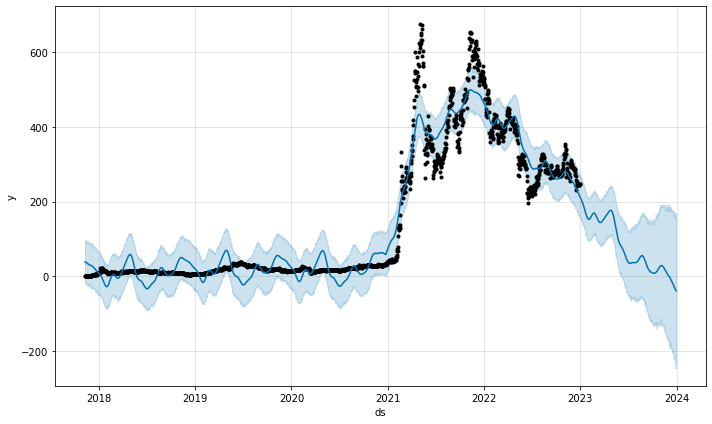

In [44]:
plot1 = m.plot(forecast)